# Probability 101 for Astronomers 

## Uncertanties, fitting and all that jazz

"Cosmologists are often in error but seldom in doubt" <i> Lev Landau.</i>

We continue our statistics discussion with a review of errors, fitting and how to make sense of all that data.
We are using the same data file on heights and genders, but now each of the measurements of heights and weights has an associated error.

Now that we understand the distributions of these parameters, we can look at starting to fit those properties in a statistically rigorous way.

## Errors and the $\chi^2$ distribution:

In this example we are going to apply what we've learned about the $\chi^2$ distributions and are going to use it to fit data with a given model.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.ticker import NullFormatter

In [14]:
df=pd.read_csv("../data/01_heights_weights_genders_errors.csv") ## Data from "Machine Learning for Hackers"
df.head()

,Unnamed: 0,Gender,Height,Height errors,Weight,Weight errors
0,0,Male,73.847017,1.685135,241.893563,2.168184
1,1,Male,68.781904,0.367460,162.310473,8.853313
2,2,Male,74.110105,1.494730,212.740856,10.073004
3,3,Male,71.730978,1.525215,220.042470,2.694308
4,4,Male,69.881796,2.871325,206.349801,10.431189


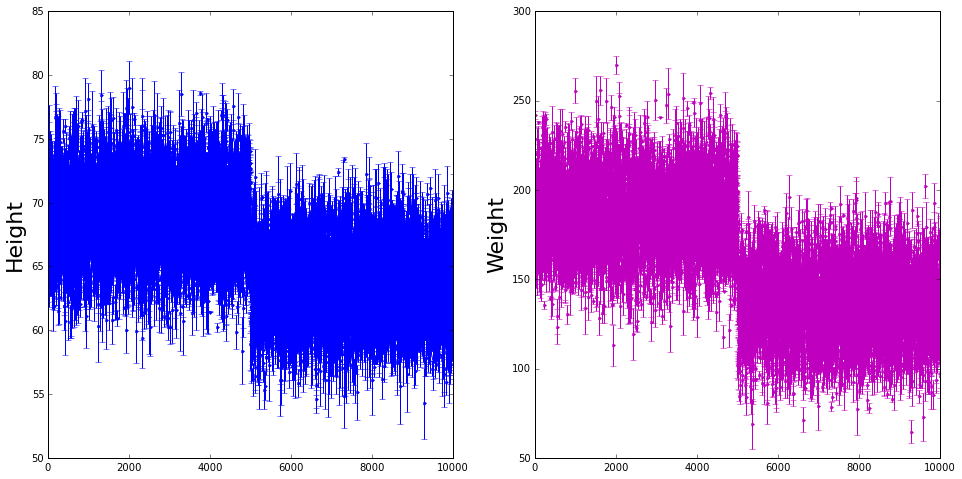

In [15]:
## Pull both the heights and weights from the distribution as before
x=df['Height']
xerr = df['Height errors']
plt.figure(1,figsize=(16,8))
plt.subplot(121) ## [row, column, fignum]
plt.errorbar(range(np.shape(x)[0]), x, yerr=xerr, marker='.', linestyle='None')
plt.ylabel('Height', fontsize=22)

y = df['Weight']
yerr = df['Weight errors']
plt.figure(1,figsize=(16,8))
plt.subplot(122) ## [row, column, fignum]
plt.errorbar(range(np.shape(y)[0]), y, yerr=yerr, marker='.', color='m', linestyle='None')
plt.ylabel('Weight', fontsize=22)

Recall from the previous workshop we defined the $\chi^2$ distribution as
$$p(x) = \frac{1}{2^{k/2} \Gamma(k/2)} x^{k/2 -1} e^{-x/2}$$ 

But what relationship does that have to our data?

If we assume that the errors on our problem are normally distributed (i.e. according to a Gaussian distribution), we can write the likelihood (the $P(D|\mathrm{\theta})$ part of the Bayesian formula we defined above) as a Gaussian likelihood in the difference between a theory model specified by a vector number of parameters $t(x,\mathbf{\theta)}$ and our vector of data points, $\mathbf{d}$, or

$$ P(D|\mathbf{\theta}) = \frac{1}{\sqrt{2\pi\sigma^2}}\exp{\left[-\sum_i\frac{(d_i-t(x_i,\theta_i))^2}{2\sigma_i^2}\right]} $$

Now we can compare the variable $x$ from the $\chi^2$ distribution to the argument of the Gaussian above, and find that 
$$ x = \chi^2 = \sum_i{\frac{(d_i - t(\theta)_i)^2}{\sigma_i^2}} $$

So the $\chi^2$ statistic describes how far away from a given model the data lie. So if we want to maximise the likelihood (which we do), we only need to minimise the $\chi^2.$

* As an exercise - show that maximising the likelihood and minimising the $\chi^2$ are equivalent.
In vector form the above equation is:
$$ \chi^2 = [\mathrm{Y}-\mathbf{A}\mathrm{X}]^{\mathrm{T}}\mathbf{C}^{-1}[\mathrm{Y}-\mathbf{A}\mathbf{X}] $$

where $\mathrm{Y}$ is a vector of the $y$-data (weight) and $\mathrm{A}$ is an MxN matrix which is included in the model, so that we are modelling $\mathbf{Y} = \mathbf{A}\mathbf{X}$.

* As an exercise at home, derive the vector form given the first equation.

$\mathbf{C}$ is a matrix of the variances of the problem (note that this doesn't assume that they are uncorrelated, which is what the first sum does.

In the numerical case the data we would model would be the heights or weights, $\mathbf{h}$ or $\mathbf{w}.$
The error bars given above provide an estimate of the uncertainty in the data, or $\sigma_{w,i}$ or $\sigma_{h,i}$.

<i> As an aside: can you think of a reason why there might be a discrepancy in the size of the error bars on the different measurents of height and weight?</i>


We'll plot just a few points as an example, considering for now only the error in the weights:

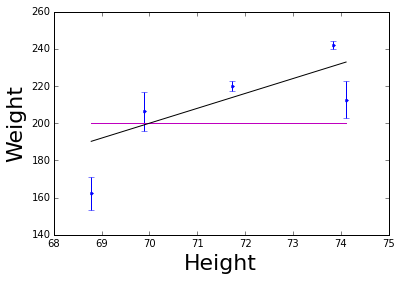

In [18]:
## Define the x,y variables from the datafile
x=df['Height']
y=df['Weight']
yerr = df['Weight errors']

## define a small subset for the example
inds = range(5)
xsub = x[inds]
ysub=y[inds]
yerrsub=yerr[inds]
#making a linear plotting vector to make things more attractive
linearx = np.sort(xsub)

## Plot the weights as a function of height
plt.clf()
plt.errorbar(xsub,ysub,yerrsub, marker='.', linestyle='None')
plt.plot(linearx, 200*np.ones(np.shape(inds)[0]), color='m')
plt.plot(linearx,8*linearx-360, color='k')
plt.xlabel('Height', fontsize=22)
plt.ylabel('Weight', fontsize=22)


##Computing the $\chi^2$:

Comparing the two models even by eye, we can 'count' the number of standard deviations, or $\sigma$ that the curves lie away from the two models.

Can you determine the $\chi^2$ of the first model with respect to the constant model?

What about with respect to the linear model?

In [19]:
## Computing the chi^2 for the smaller subset above

## constant model
tconst = 200*np.ones(np.shape(inds)[0])
## linear model
tlin = 8*xsub-360

##compute the chi^2 values

x2const = (ysub-tconst)**2/yerrsub**2
x2lin = (ysub-tlin)**2/yerrsub**2

print 'chi2 const = ', np.sum(x2const)
print 'chi2 lin = ', np.sum(x2lin)


chi2 const =  448.767530877
chi2 lin =  46.0274185511


Note that the values given above are the $\chi^2$ values, and not the $\chi^2$ per degree of freedom.
We take the degrees of freedom to be the number of data points minus the number of parameters in the model.

So the constant case has $N - 1$ degrees of freedom and the linear case has $N -2$ degrees of freedom

In [20]:
print 'reduced chi2 const = ', np.sum(x2const)/(np.shape(inds)[0]-1)
print 'reduced chi2 lin = ', np.sum(x2lin)/(np.shape(inds)[0]-2)

reduced chi2 const =  112.191882719
reduced chi2 lin =  15.3424728504


In this case, the linear case is still a much better fit than the constant model.

### Minimisation of the $\chi^2$:

Given a particular model specified by the parameters $\mathbf{\theta}$, we can obtain the best-fitting values of those parameters $\mathbf{\theta}$ by minimising the $\chi^2$ statistic with respect to the parameters:

$$ \frac{\partial \chi^2}{\partial \theta_a} = 0 \\ a = 0,1,...,m $$ 
where $m$ are the number of parameters in your model.

The best-fit is found as:

$$ \mathbf{X} = [\mathbf{A}^{\mathrm{T}}\mathbf{C}^{-1}\mathbf{A}]^{-1}[\mathbf{A}^{\mathrm{T}}\mathbf{C}^{-1}\mathbf{Y}] $$

There is a great example of how to solve this problem in the following problem
http://arxiv.org/pdf/1008.4686v1.pdf


#### Analytic minimisation
Let's consider for interest sake the case of a linear model again, specified as:

$$ t(x,\mathbf{\theta}) = \theta_1x+\theta_2 $$

* As an exercise, analytically compute the best-fit parameters for this model fittin to $N$ data points $d_i$ with errors $\sigma_i.$


#### Numeric minimisation

Given that analytic minimisation is not always possible, we need to handle the problem numerically.

We are going to now consider the entire data set given above for the heights (again for now assume there are no errors on the height measurements) and the weights (taken with errors). You are going to write code the fits a straight line to the data, like the one specified above. You will need to vary the parameters on a grid and compute the $\chi^2$ of the model, and then calculate the set of parameters that minimises $\chi^2$.

In [ ]:
## your code here






### Two-sided errors

In the original example we only considered errors on the weights (the $y$ variable), but we know that in this example there are errors in both $x$ and $y$. 

One solution (in the linear case) is to minimise the following $\chi^2:$

$$ \chi^2(\theta_1, \theta_2) = \sum_i \frac{(y_i - \theta_1x_i - \theta_2)^2}{\sigma_{y,i}^2 + \theta_1\sigma_{x,i}^2} $$

If you have time, adapt your code to use the $\chi^2$ above and repeat the minimisation. How do your answers change?
Again, take a look at Chapter 7 in the example http://arxiv.org/pdf/1008.4686v1.pdf for tips. We will get to the Bayesian solution in the next class.